In [2]:
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
data = pd.read_csv('data/train.csv')

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
print(f'The data has {data.shape[0]} rows and {data.shape[1]} columns')

The data has 1460 rows and 81 columns


In [6]:
nan_counts = data.isna().sum()
columns_with_many_nans = nan_counts[nan_counts > 700].index
print("Columns with more than 100 NaN values:")
for col in columns_with_many_nans:
    print(col)

Columns with more than 100 NaN values:
Alley
MasVnrType
PoolQC
Fence
MiscFeature


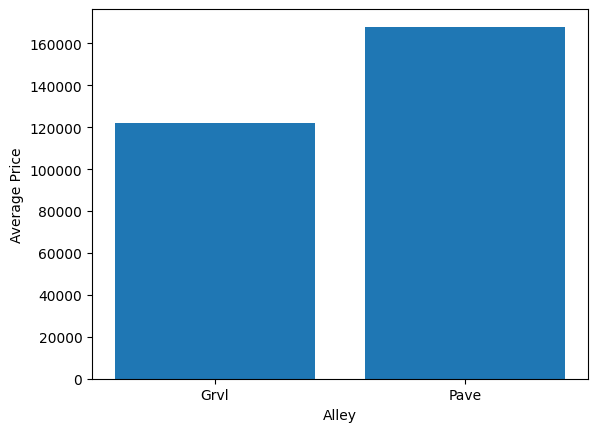

In [7]:
alley_price = data.groupby('Alley')['SalePrice'].mean()
plt.bar(alley_price.index, alley_price)
plt.xlabel('Alley')
plt.ylabel('Average Price')
plt.show()

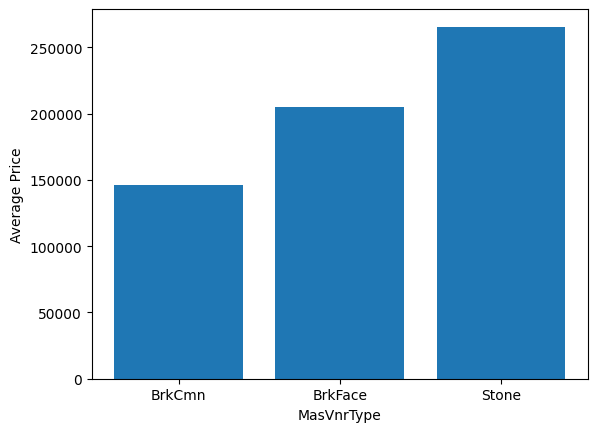

In [8]:
mvnrt_price = data.groupby('MasVnrType')['SalePrice'].mean()
plt.bar(mvnrt_price.index, mvnrt_price)
plt.xlabel('MasVnrType')
plt.ylabel('Average Price')
plt.show()

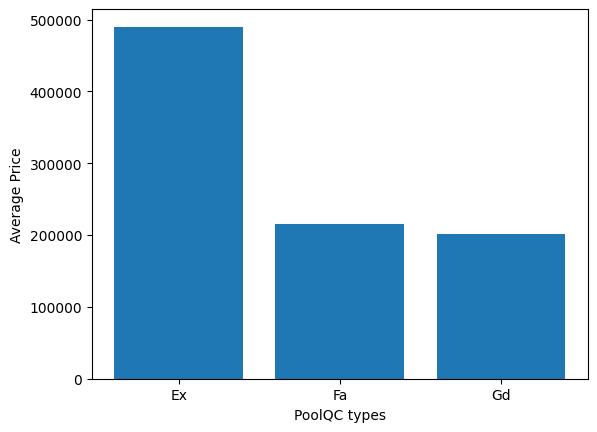

In [9]:
poolqc_price = data.groupby('PoolQC')['SalePrice'].mean()
plt.bar(poolqc_price.index, poolqc_price)
plt.xlabel('PoolQC types')
plt.ylabel('Average Price')
plt.show()

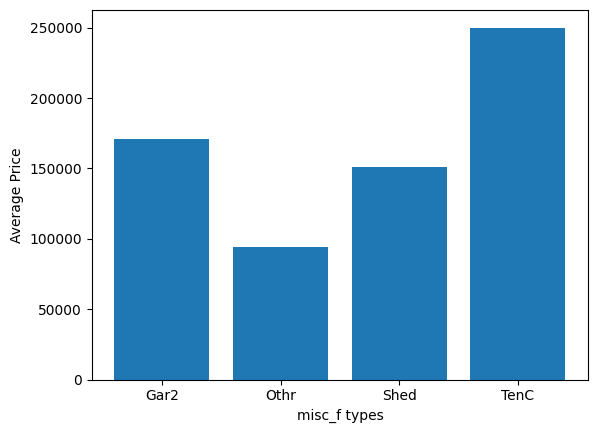

In [10]:
misc_f_price = data.groupby('MiscFeature')['SalePrice'].mean()
plt.bar(misc_f_price.index, misc_f_price)
plt.xlabel('misc_f types')
plt.ylabel('Average Price')
plt.show()

In [11]:
#This proves stone prices are expensive 
columns_with_many_nans = list(columns_with_many_nans)

In [12]:
columns_with_many_nans

['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature']

In [13]:
columns_with_many_nans.remove('MasVnrType')

In [14]:
columns_with_many_nans.remove('PoolQC')


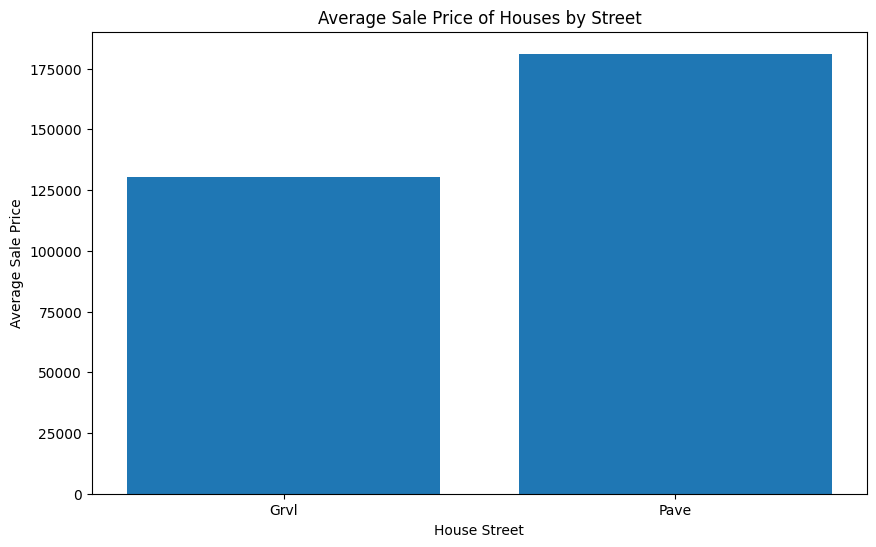

In [15]:
street_avg_price = data.groupby('Street')['SalePrice'].mean()
plt.figure(figsize=(10, 6))
plt.bar(street_avg_price.index, street_avg_price)
plt.xlabel('House Street')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price of Houses by Street')
plt.show()

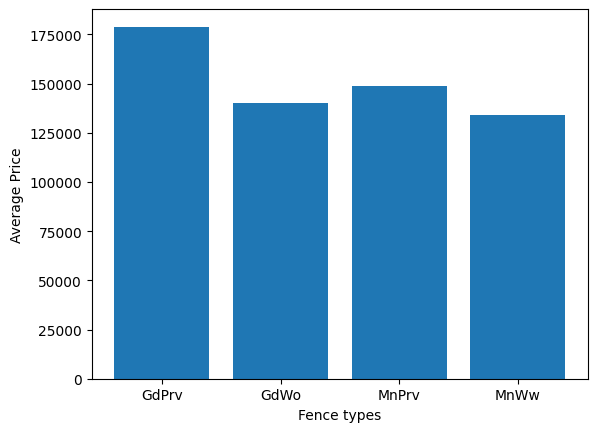

In [16]:
fence_price = data.groupby('Fence')['SalePrice'].mean()
plt.bar(fence_price.index, fence_price)
plt.xlabel('Fence types')
plt.ylabel('Average Price')
plt.show()

In [17]:
#The Alley information is given by Street without much nan value. atleast approximately. So we can delete Alley column
#We are not dropping MasVnrType as it provides useful info which is not compensated.
#Even PoolQC is useful info as the class Ex alone has shown drastic shoot up in price
#Misc Feature is useless as the shed shows hsoot up in price but its not important and since it adds different features, it adds high statistical bias
#We are not removing Fence as the classes of fence provide some information for classification. Also theoretically fencing adds extra cost.

In [18]:
columns_with_many_nans.remove('Fence')

In [19]:
data = data.drop(columns = columns_with_many_nans)

In [20]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

In [21]:
col = []
for column in data.columns: 
    if len(data[column].unique()) < 20:
        print(f'{column} : {data[column].unique()}')
        col.append(column)

MSSubClass : [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
MSZoning : ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street : ['Pave' 'Grvl']
LotShape : ['Reg' 'IR1' 'IR2' 'IR3']
LandContour : ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities : ['AllPub' 'NoSeWa']
LotConfig : ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope : ['Gtl' 'Mod' 'Sev']
Condition1 : ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 : ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType : ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle : ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
OverallQual : [ 7  6  8  5  9  4 10  3  1  2]
OverallCond : [5 8 6 7 4 2 3 9 1]
RoofStyle : ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl : ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Exterior1st : ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' '

In [22]:
for name in col: 
    print(name, end = ' ')

MSSubClass MSZoning Street LotShape LandContour Utilities LotConfig LandSlope Condition1 Condition2 BldgType HouseStyle OverallQual OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC CentralAir Electrical BsmtFullBath BsmtHalfBath FullBath HalfBath BedroomAbvGr KitchenAbvGr KitchenQual TotRmsAbvGrd Functional Fireplaces FireplaceQu GarageType GarageFinish GarageCars GarageQual GarageCond PavedDrive PoolArea PoolQC Fence MoSold YrSold SaleType SaleCondition 

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [24]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


C:\Users\Sanje\AppData\Local\Temp\ipykernel_32996\4060181630.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['SalePrice'], bins=50);
c:\Users\Sanje\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


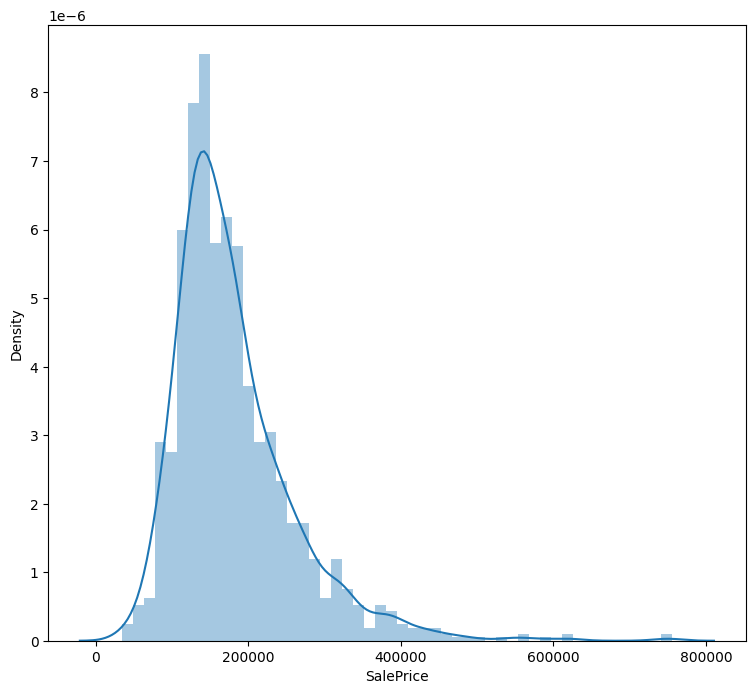

In [25]:
print(data['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(data['SalePrice'], bins=50);

In [26]:
#So we can observe that the price basically falls under the range around 200000.

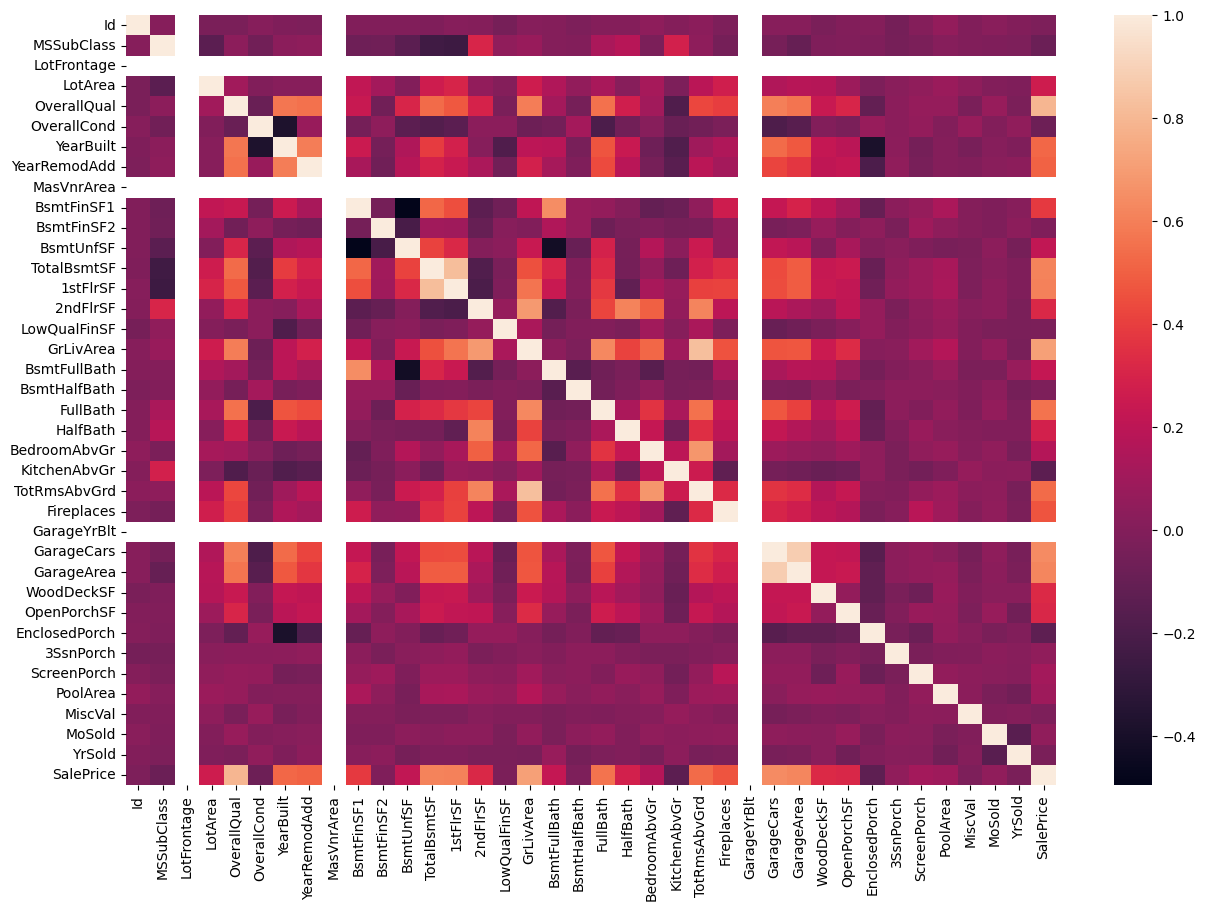

In [27]:
numeric_data = data.select_dtypes(include=[np.number])
corr_matrix = np.corrcoef(numeric_data.values.T)
col_names = numeric_data.columns
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, xticklabels=col_names, yticklabels=col_names)
plt.show()

In [28]:
# Based on some understanding of Google information about House sale pricing and from the data description and from a bIT OF CHATGPT explanation of the data descritption, I was able to build some evident relations
data['overall cond-qual']        = data['OverallQual']  + data['OverallCond']
data['YearRemodAdd-YearBuilt ']  = data['YearRemodAdd'] - data['YearBuilt']
data['BsmtBaths']                = data['BsmtFullBath'] + data['BsmtHalfBath']*0.5
data['AboveBaths']               = data['FullBath']     + data['HalfBath']*0.5
data['TotalBaths']               = data['BsmtBaths']    + data['AboveBaths']
data['OverallExteriorLivingSF'] = (data['WoodDeckSF'] + 
                                 data['OpenPorchSF'] + 
                                 data['EnclosedPorch'] + 
                                 data['3SsnPorch'] + 
                                 data['ScreenPorch'] + 
                                 data['PoolArea'])
data['TotalAboveGradeLivingSF'] = data['GrLivArea'] + 0.5 * data['LowQualFinSF'] 
data['TotalBasementSF'] = data['BsmtFinSF2'] + data['BsmtUnfSF']
data['OverallUsbleSf'] = data['GrLivArea']+data['OverallExteriorLivingSF']


In [29]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,SalePrice,overall cond-qual,YearRemodAdd-YearBuilt,BsmtBaths,AboveBaths,TotalBaths,OverallExteriorLivingSF,TotalAboveGradeLivingSF,TotalBasementSF,OverallUsbleSf
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,208500,12,0,1.0,2.5,3.5,61,1710.0,150,1771
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,181500,14,0,0.5,2.0,2.5,298,1262.0,284,1560
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,223500,12,1,1.0,2.5,3.5,42,1786.0,434,1828
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,140000,12,55,1.0,1.0,2.0,307,1717.0,540,2024
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,250000,13,0,1.0,2.5,3.5,276,2198.0,490,2474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,175000,11,1,0.0,2.5,2.5,40,1647.0,953,1687
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,210000,12,10,1.0,2.0,3.0,349,2073.0,752,2422
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,266500,16,65,0.0,2.0,2.0,60,2340.0,877,2400
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,142125,11,46,1.0,1.0,2.0,478,1078.0,1029,1556


In [30]:
data['OverallQual']

0       7
1       6
2       7
3       7
4       8
       ..
1455    6
1456    6
1457    7
1458    5
1459    5
Name: OverallQual, Length: 1460, dtype: int64

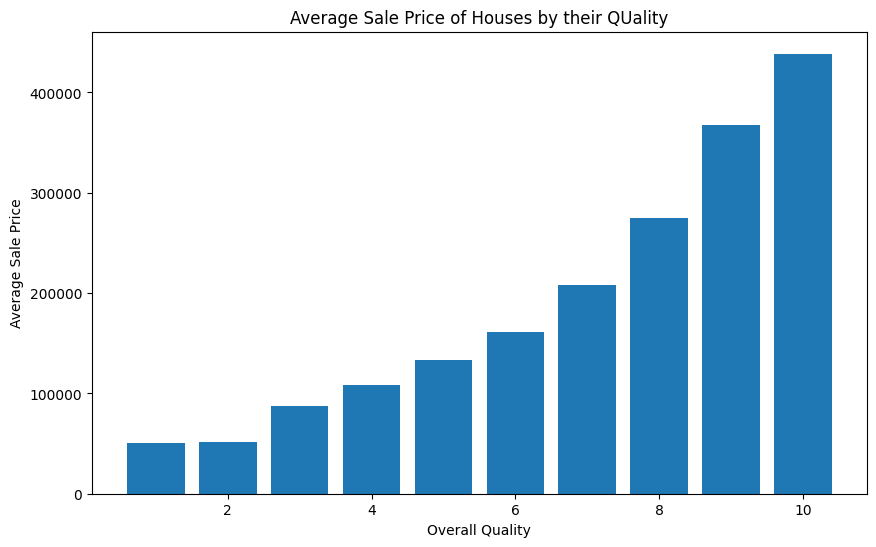

In [31]:
quality_avg_price = data.groupby('OverallQual')['SalePrice'].mean()
plt.figure(figsize=(10, 6))
plt.bar(quality_avg_price.index, quality_avg_price)
plt.xlabel('Overall Quality')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price of Houses by their QUality')
plt.show()

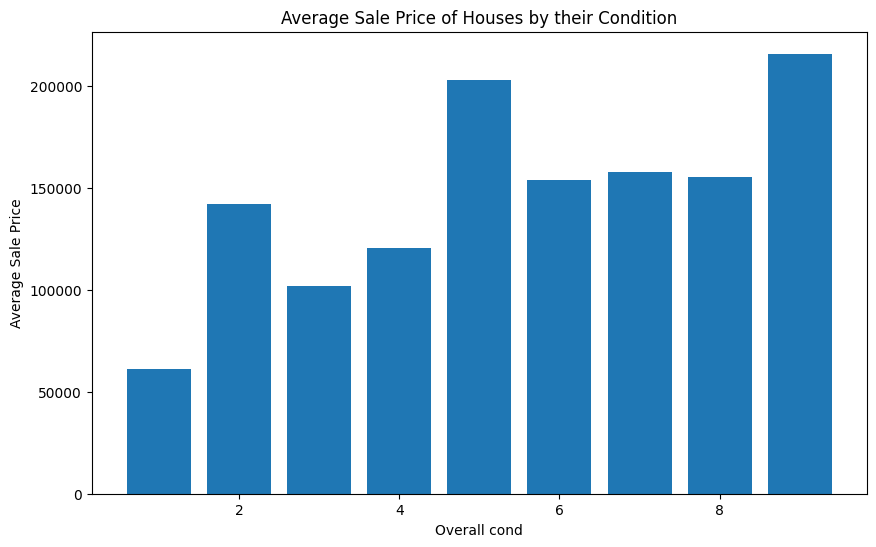

In [32]:
cond_avg_price = data.groupby('OverallCond')['SalePrice'].mean()
plt.figure(figsize=(10, 6))
plt.bar(cond_avg_price.index, cond_avg_price)
plt.xlabel('Overall cond')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price of Houses by their Condition')
plt.show()

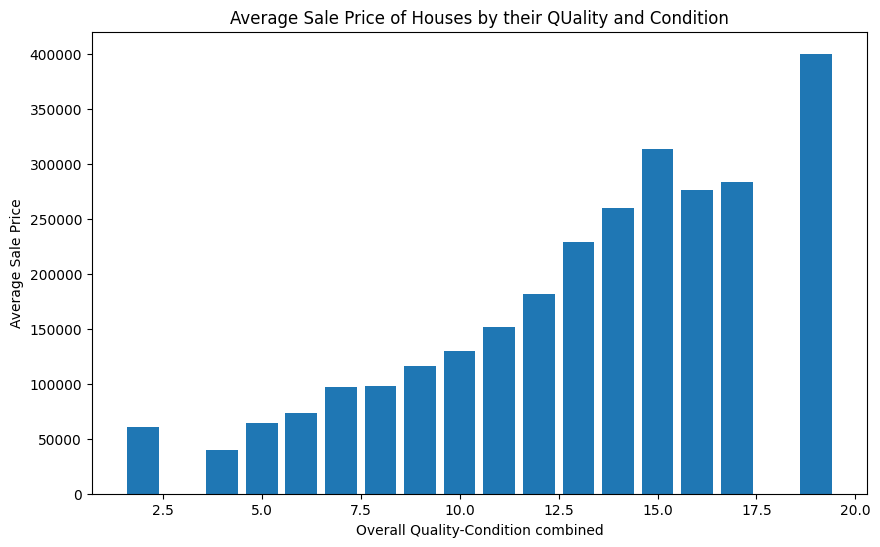

In [33]:
qualcond_avg_price = data.groupby('overall cond-qual')['SalePrice'].mean()
plt.figure(figsize=(10, 6))
plt.bar(qualcond_avg_price.index, qualcond_avg_price)
plt.xlabel('Overall Quality-Condition combined')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price of Houses by their QUality and Condition')
plt.show()

In [34]:
data['2ndFlrSF'] 

0        854
1          0
2        866
3        756
4       1053
        ... 
1455     694
1456       0
1457    1152
1458       0
1459       0
Name: 2ndFlrSF, Length: 1460, dtype: int64

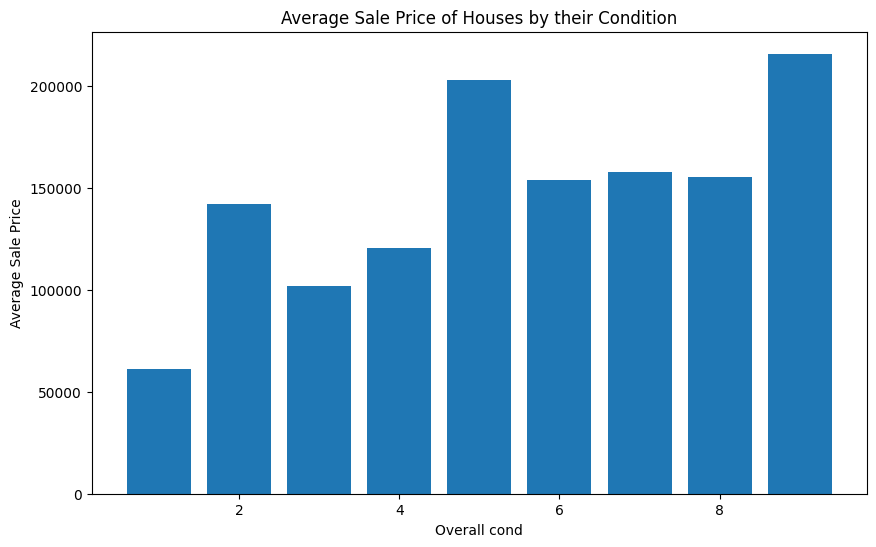

In [35]:
cond_avg_price = data.groupby('OverallCond')['SalePrice'].mean()
plt.figure(figsize=(10, 6))
plt.bar(cond_avg_price.index, cond_avg_price)
plt.xlabel('Overall cond')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price of Houses by their Condition')
plt.show()

In [36]:
#Now we shall find the outlier boundaries for all the columns. The ones far away from the boxplot mean, median 
#This means the values >= boundary are all outliers
outliers = data.quantile(q=0.90, numeric_only=True)
outliers

Id                           1314.1
MSSubClass                    120.0
LotFrontage                    96.0
LotArea                     14381.7
OverallQual                     8.0
OverallCond                     7.0
YearBuilt                    2006.0
YearRemodAdd                 2006.0
MasVnrArea                    335.0
BsmtFinSF1                   1065.5
BsmtFinSF2                    117.2
BsmtUnfSF                    1232.0
TotalBsmtSF                  1602.2
1stFlrSF                     1680.0
2ndFlrSF                      954.2
LowQualFinSF                    0.0
GrLivArea                    2158.3
BsmtFullBath                    1.0
BsmtHalfBath                    0.0
FullBath                        2.0
HalfBath                        1.0
BedroomAbvGr                    4.0
KitchenAbvGr                    1.0
TotRmsAbvGrd                    9.0
Fireplaces                      1.0
GarageYrBlt                  2006.0
GarageCars                      3.0
GarageArea                  

In [37]:
data = data.drop('Id', axis=1)

<Axes: xlabel='BedroomAbvGr'>

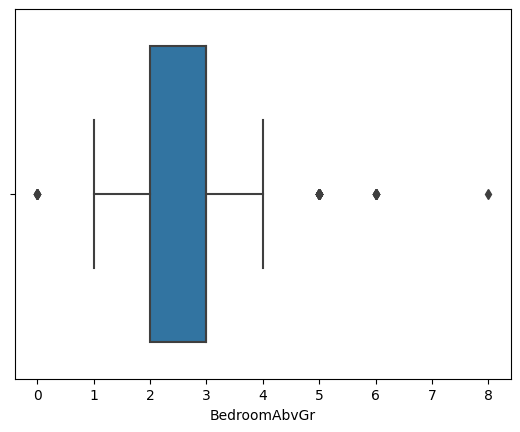

In [38]:
import seaborn as sns 
sns.boxplot(x=data['BedroomAbvGr'])

c:\Users\Sanje\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='YrSold'>

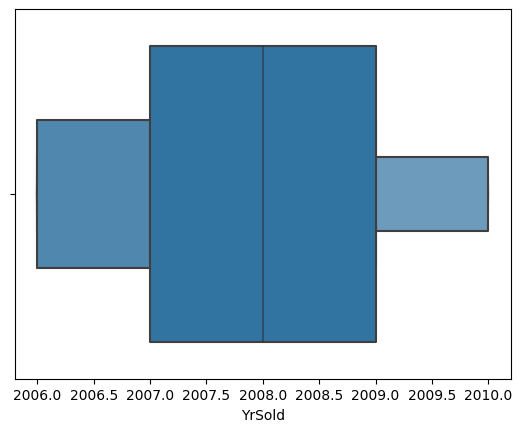

In [39]:
sns.boxenplot(x=data['YrSold'])

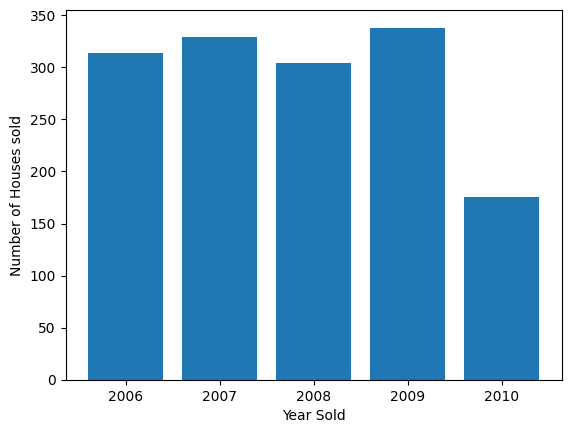

In [40]:
import matplotlib.pyplot as plt 
num_houses = data.groupby('YrSold')['SalePrice'].count()
plt.bar(num_houses.index, num_houses)
plt.xlabel('Year Sold')
plt.ylabel('Number of Houses sold')
plt.show()


<Axes: xlabel='TotRmsAbvGrd'>

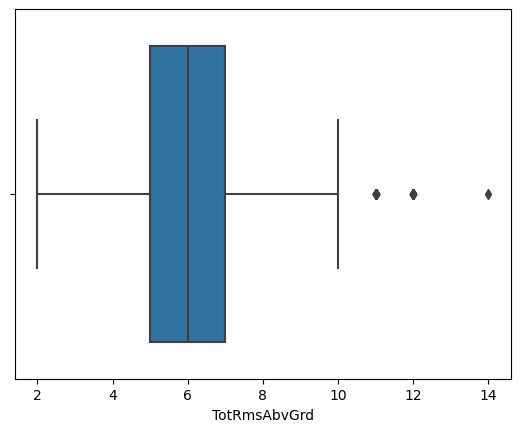

In [41]:
sns.boxplot(x=data['TotRmsAbvGrd'])
#The boundary for outlier is 10.0, So there are 3 outliers

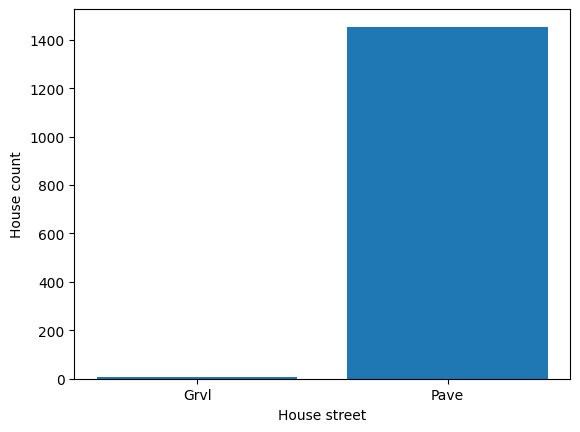

In [42]:
street_houses = data.groupby('Street')['SalePrice'].count()

plt.bar(street_houses.index, street_houses)
plt.xlabel('House street')
plt.ylabel('House count')
plt.show()

In [43]:
print(street_houses)

Street
Grvl       6
Pave    1454
Name: SalePrice, dtype: int64


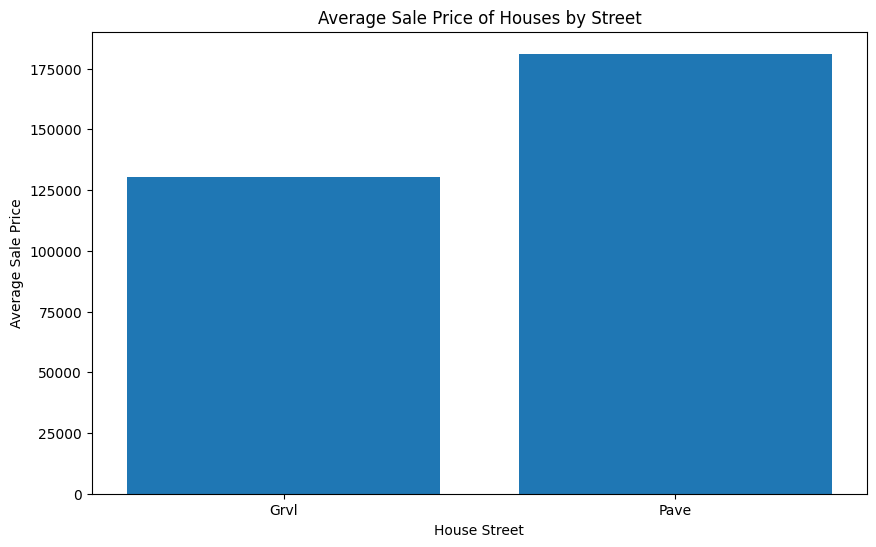

In [44]:
street_avg_price = data.groupby('Street')['SalePrice'].mean()
plt.figure(figsize=(10, 6))
plt.bar(street_avg_price.index, street_avg_price)
plt.xlabel('House Street')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price of Houses by Street')
plt.show()

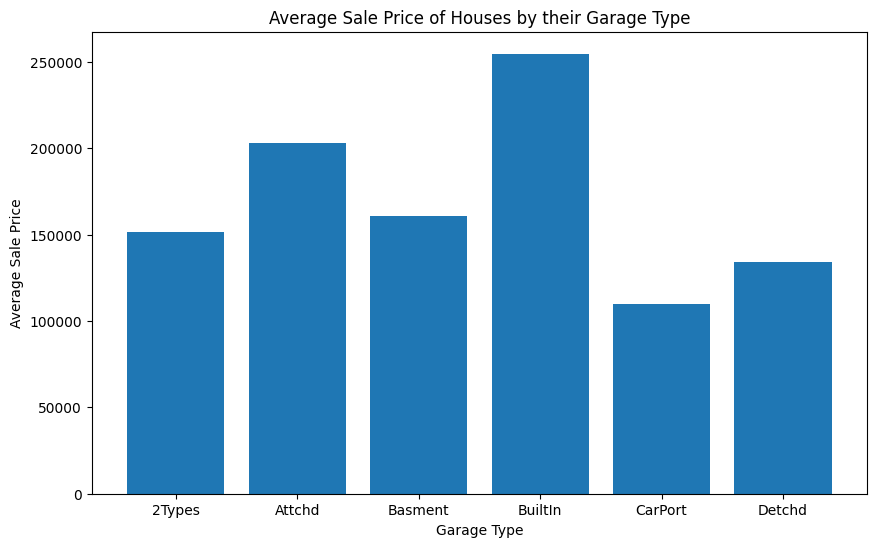

In [45]:
zonal_avg_price = data.groupby('GarageType')['SalePrice'].mean()
plt.figure(figsize=(10, 6))
plt.bar(zonal_avg_price.index, zonal_avg_price)
plt.xlabel('Garage Type')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price of Houses by their Garage Type')
plt.show()
#You have high price in the builtin

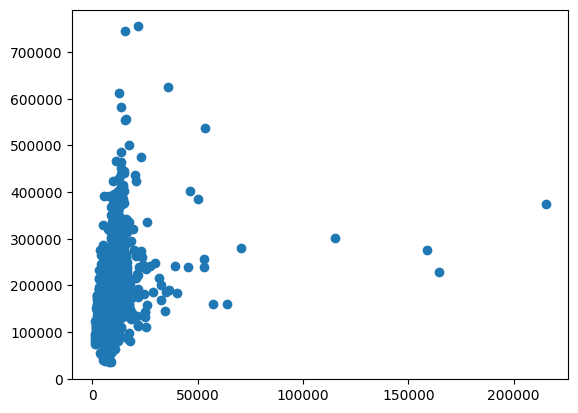

In [46]:
plt.scatter(data['LotArea'], data['SalePrice'])

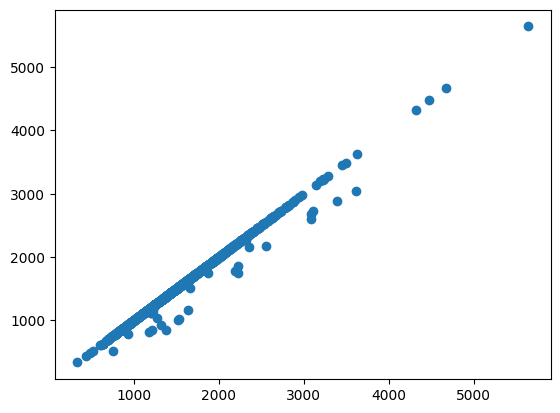

In [47]:
plt.scatter(data['GrLivArea'], data['1stFlrSF']+data['2ndFlrSF'])

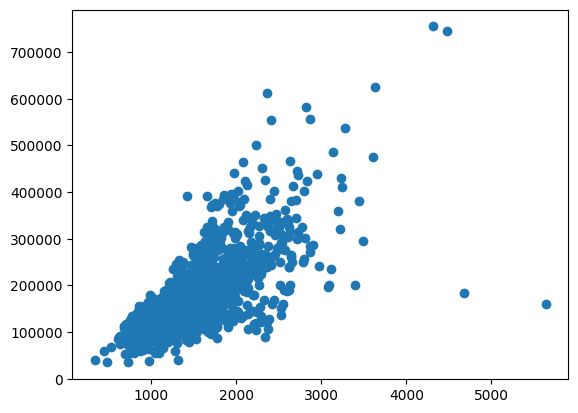

In [48]:
plt.scatter(data['GrLivArea'], data['SalePrice'])

c:\Users\Sanje\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SalePrice'>

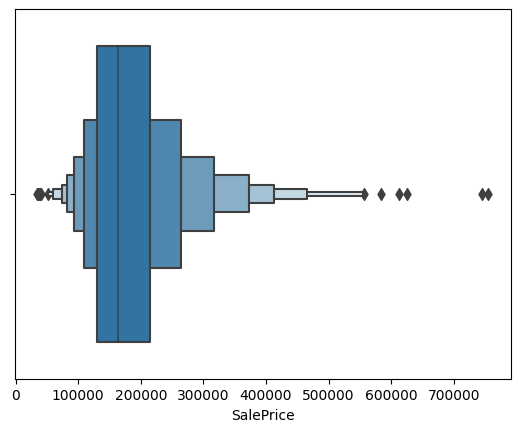

In [49]:
sns.boxenplot(x=data[data['Street'] == 'Pave']['SalePrice'])

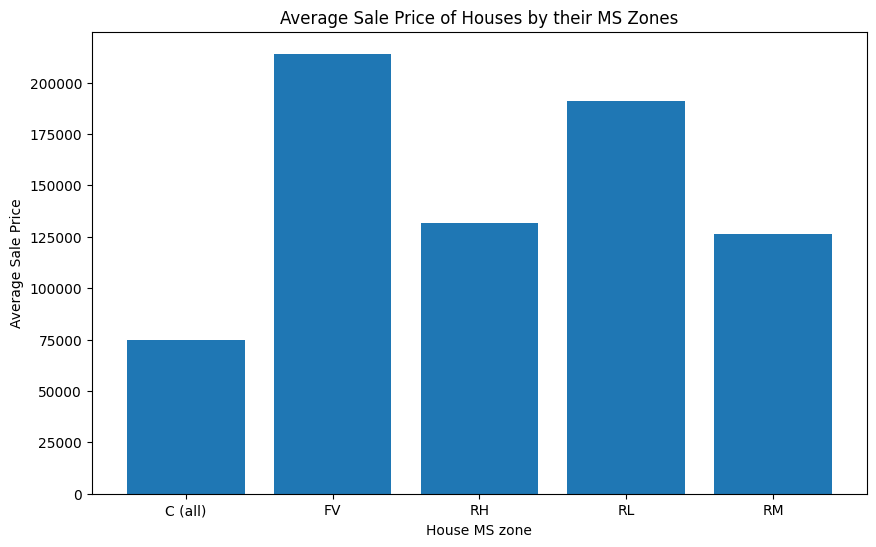

In [50]:
zonal_avg_price = data.groupby('MSZoning')['SalePrice'].mean()
plt.figure(figsize=(10, 6))
plt.bar(zonal_avg_price.index, zonal_avg_price)
plt.xlabel('House MS zone')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price of Houses by their MS Zones')
plt.show()
#So from the plot we can analyze that the Average price of FV zone is comparatively higher

In [51]:
#Time Series Analysis - No evident change

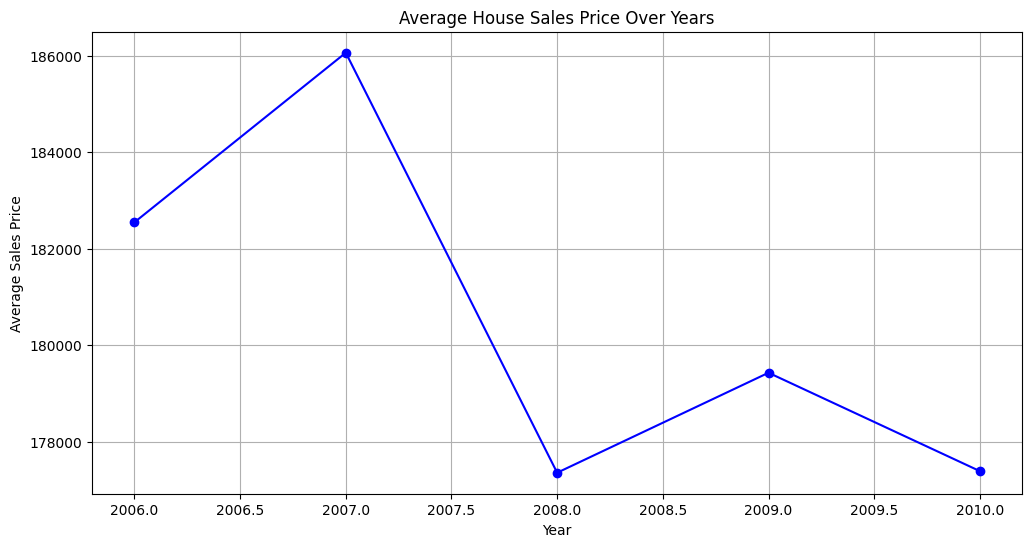

In [52]:
df_yearly = data.groupby('YrSold')['SalePrice'].mean().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(df_yearly['YrSold'], df_yearly['SalePrice'], marker='o', linestyle='-', color='b')
plt.title('Average House Sales Price Over Years')
plt.xlabel('Year')
plt.ylabel('Average Sales Price')
plt.grid()
plt.show()
#We can see that the process have skyrocketed in 2007 compared to the other months

In [54]:
# Assigning a default day (e.g., 1) to `YrSold` and `MoSold` columns to create a full datetime
data['Date'] = pd.to_datetime(data['YrSold'].astype(str) + '-' + data['MoSold'].astype(str) + '-01')
data.set_index('Date', inplace=True)
monthly_data = data.resample('M')['SalePrice'].mean().dropna()


C:\Users\Sanje\AppData\Local\Temp\ipykernel_32996\3228517464.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data.resample('M')['SalePrice'].mean().dropna()


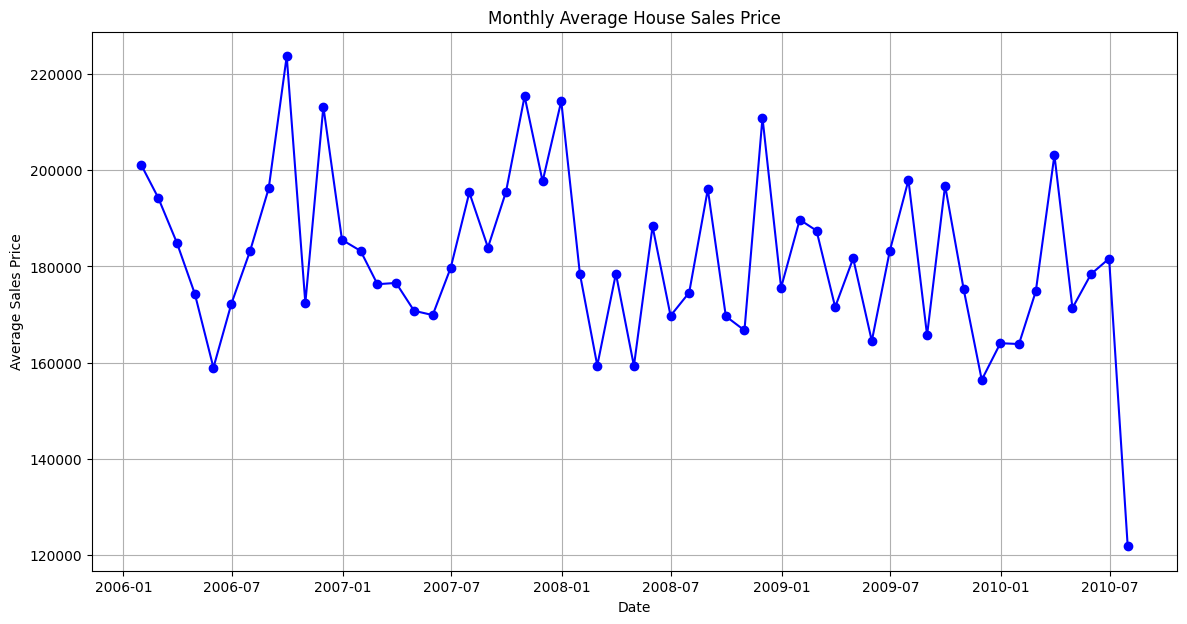

In [55]:
plt.figure(figsize=(14, 7))
plt.plot(monthly_data, marker='o', linestyle='-', color='blue')
plt.title('Monthly Average House Sales Price')
plt.xlabel('Date')
plt.ylabel('Average Sales Price')
plt.grid()
plt.show()


In [56]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(monthly_data)
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
if adf_result[1] < 0.05:
    print("The data is stationary.")
else:
    print("The data is non-stationary.")


ADF Statistic: -4.346575115335643
p-value: 0.0003685708474917333
The data is stationary.


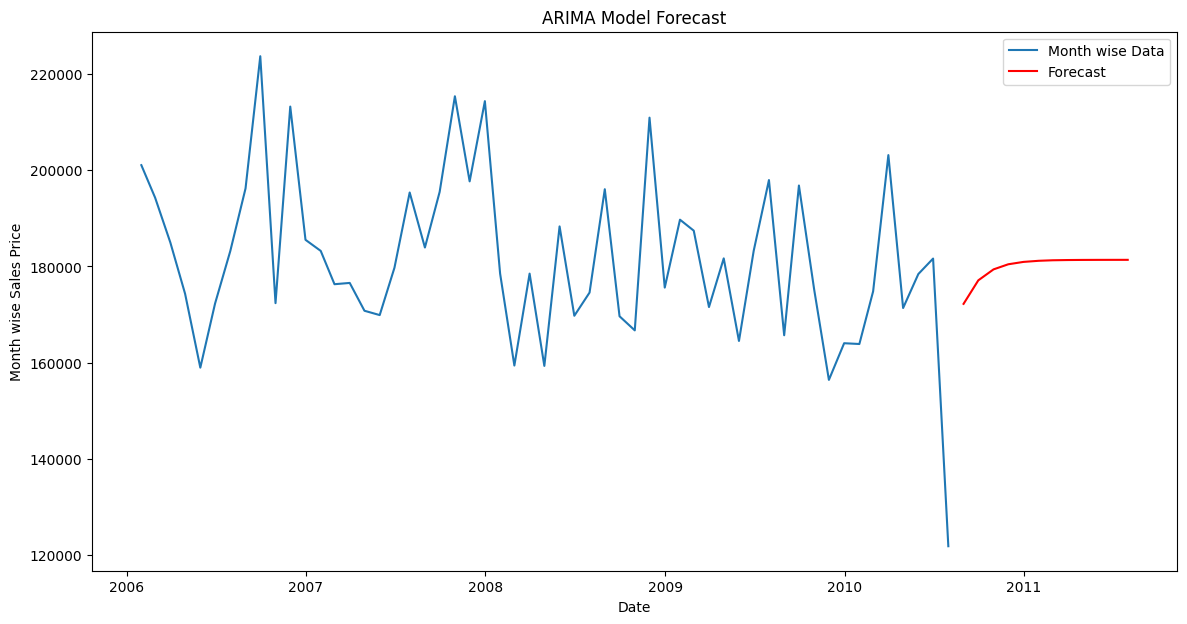

In [57]:
#Since the data is stationary 
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(monthly_data, order=(1, 0, 1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=12)
plt.figure(figsize=(14, 7))
plt.plot(monthly_data, label='Month wise Data')
plt.plot(forecast, label='Forecast', color='red')
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Month wise Sales Price')
plt.legend()
plt.show()


In [58]:
# So the average price monthly is found out tobe around 180000 in 2011. Almost the normal mean value 200000

In [99]:
data.dropna()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,SalePrice,overall cond-qual,YearRemodAdd-YearBuilt,BsmtBaths,AboveBaths,TotalBaths,OverallExteriorLivingSF,TotalAboveGradeLivingSF,TotalBasementSF,OverallUsbleSf
810,20,RL,78.0,10140,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,181000,12,25,1.0,1.5,2.5,913,1309.0,377,2222
1386,60,RL,80.0,16692,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,250000,12,0,1.0,3.5,4.5,1071,2784.0,602,3855


In [100]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
X = data.drop(columns=['SalePrice'])
y = data['SalePrice']
#categorizing the numerical columns for imputing
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numerical_cols), 
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore')) #One hot encoder. n dimensional encoding where n is the number of features 
        ]), categorical_cols)
    ])
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Ridge Regression": Ridge(),
    "Linear Regression": LinearRegression() 
}
for model_name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} - Root Mean Squared Error: {rmse:.2f}, R^2 Score: {r2:.2f}")


Random Forest - Root Mean Squared Error: 27665.42, R^2 Score: 0.90
Ridge Regression - Root Mean Squared Error: 36084.08, R^2 Score: 0.83
Linear Regression - Root Mean Squared Error: 30879.94, R^2 Score: 0.88
